# Pymaceuticals Inc.
---

### Analysis

Here are three observations or inferences that can be made from the data below:
- There is a positive correlation between the mice's (on the Capomulin regimine) weights and average tumor volumes.
- Capomulin was able to reduce mouse "b128"'s tumor volume by approximately 15 mm3 over the course of a month. The line plot does suggest that despite the drop in volume, the volume does seem to start increasing again after reaching its lowpoint on Day 35.
- Ramicine seems to be as effective as Capomulin when comparing their final tumor volume results with the box-and-whisker plots.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
print(combined_df["Mouse ID"].nunique())

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Used Xpert Learning Assistant to get this code.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Output the array
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
# Used Xpert Learning Assistant to finish this code.
duplicate_mouse_data = combined_df[combined_df['Mouse ID'] == 'g989']

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Used Xpert Learning Assistant to finish this code.
clean_data = combined_df[combined_df['Mouse ID'] != 'g989']

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
print(clean_data["Mouse ID"].nunique())

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Received help from Xpert Learning Assistant
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume').to_frame()
summary_stats['Median Tumor Volume'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Tumor Volume Variance'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Tumor Volume St. Dev.'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['Tumor Volume St. Err.'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Display the summary statistics DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method to calculate summary statistics without column renaming
# Used Xpert Learning Assistant to finish this code.
summary_stats_single_line = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics DataFrame
summary_stats_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

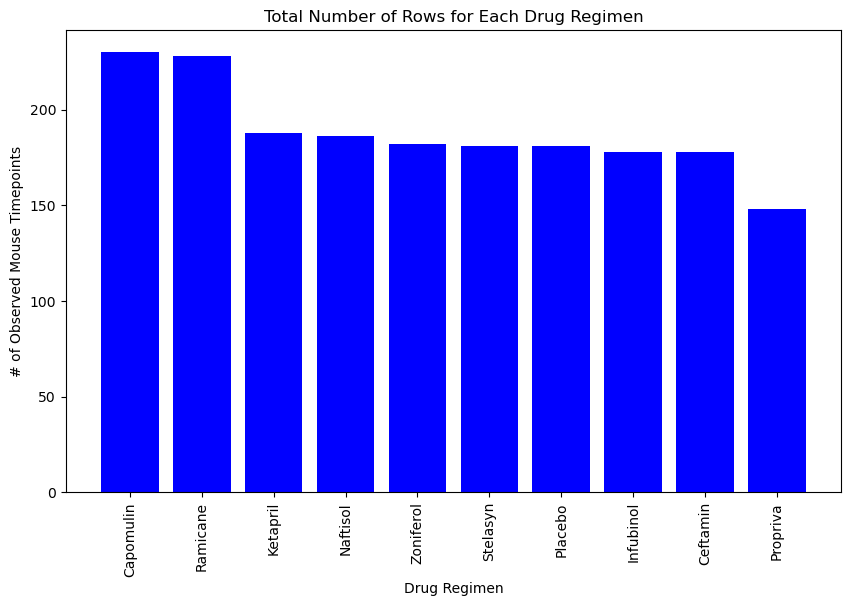

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Used Xpert Learning Assistant to finish this code.
# Create a DataFrame with value counts for each drug regimen
drug_counts = clean_data["Drug Regimen"].value_counts()

# Plot the bar chart using Pandas
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts, color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")

plt.show()


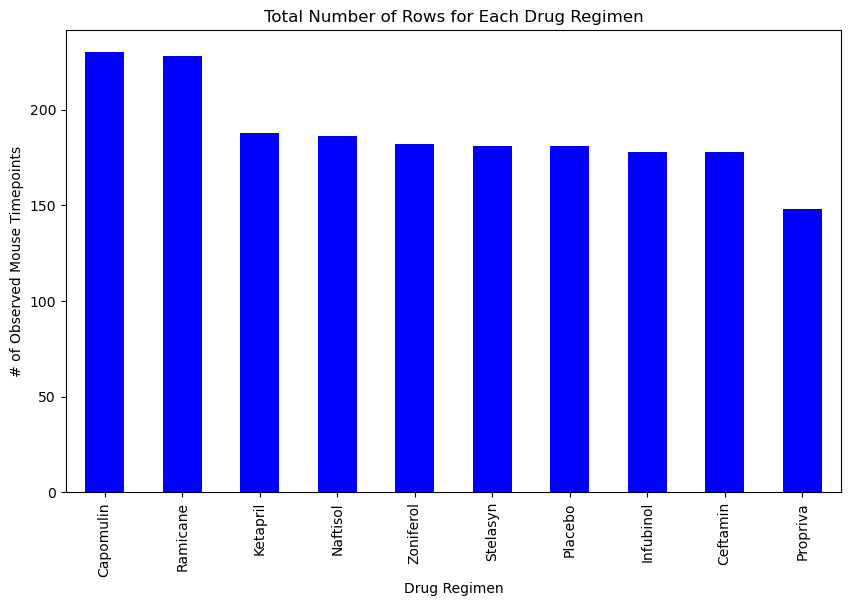

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data["Drug Regimen"].value_counts()
# Used Xpert Learning Assistant to finish this code.
# Create a bar plot using Pandas
drug_counts.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

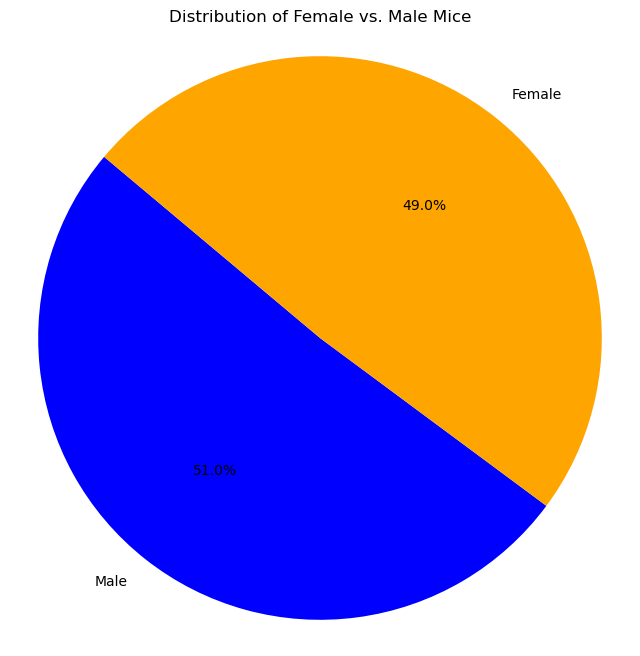

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Used Xpert Learning Assistant to finish this code.
# Create a DataFrame with value counts for each gender
gender_counts = clean_data["Sex"].value_counts()

# Extract gender labels and counts
genders = gender_counts.index
counts = gender_counts.values

# Create the pie plot using Pyplot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genders, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


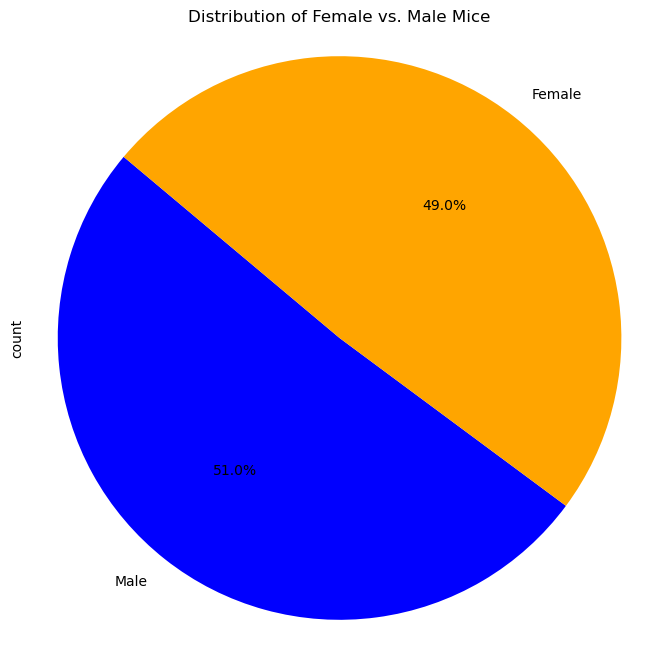

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Used Xpert Learning Assistant to finish this code.
# Create a DataFrame with value counts for each gender
gender_counts = clean_data["Sex"].value_counts()

# Plot the pie chart using Pandas
ax = gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140, figsize=(8, 8))

ax.set_title('Distribution of Female vs. Male Mice')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [72]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# Used Xpert Learning Assistant to finish this code.
# Put treatments into a list for a for loop and later for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen to calculate IQR and determine outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


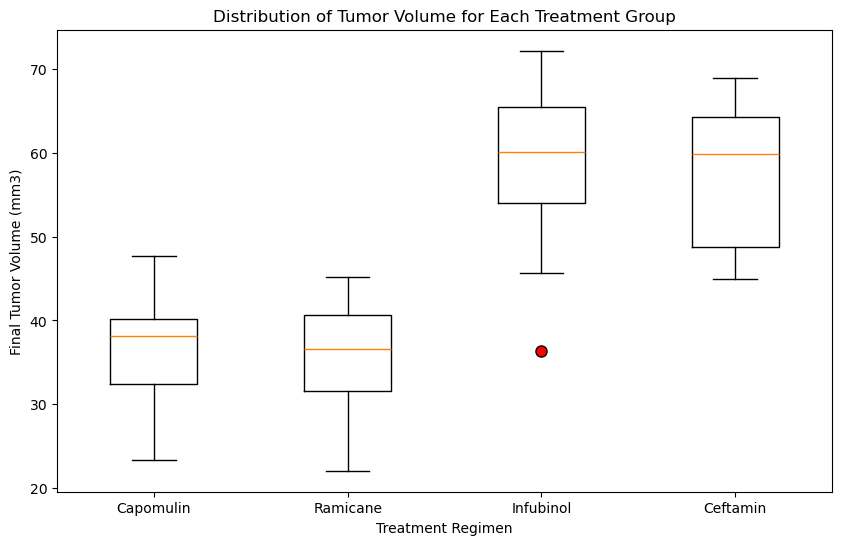

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Used Xpert Learning Assistant to finish this code.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

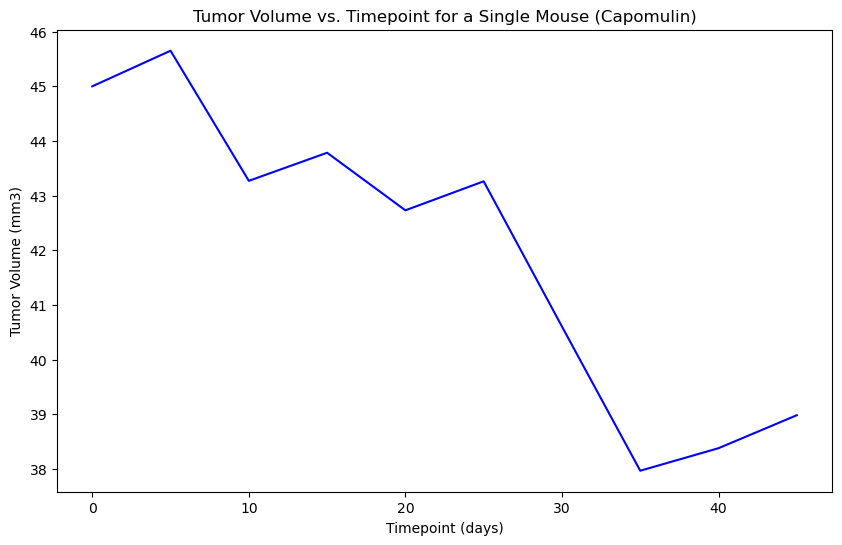

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Used Xpert Learning Assistant to finish this code.
# Select a single mouse treated with Capomulin
selected_mouse = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == "b128")]

# Get the tumor volume and time point values for the selected mouse
timepoints = selected_mouse['Timepoint']
tumor_volumes = selected_mouse['Tumor Volume (mm3)']

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(timepoints, tumor_volumes, color='blue', linestyle='-')
plt.title('Tumor Volume vs. Timepoint for a Single Mouse (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

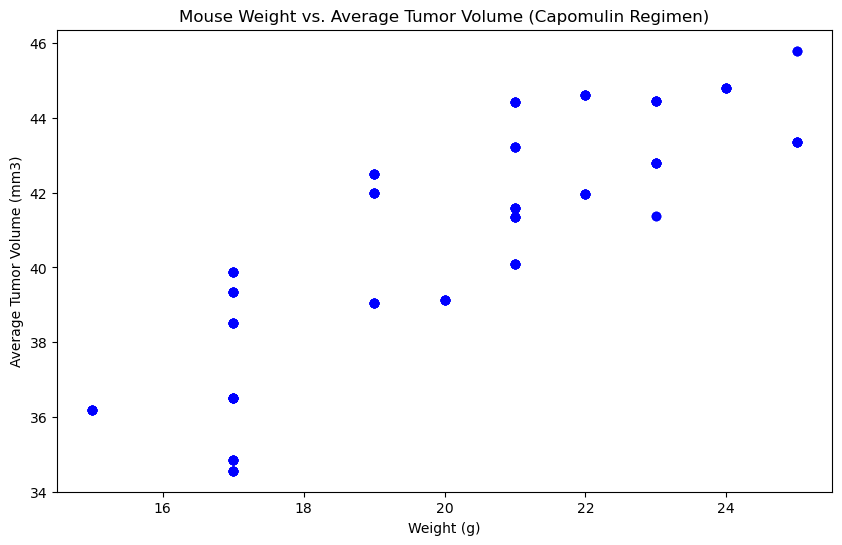

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Used Xpert Learning Assistant to finish this code.
# Group the data by "Mouse ID" to calculate the average tumor volume for each mouse
average_tumor_volume = clean_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original DataFrame to include mouse weight
merged_data = pd.merge(average_tumor_volume, clean_data, on='Mouse ID', how='left')

# Filter the data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Create a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425968
Linear Regression Model: y = 0.96x + 21.49
R-squared Value: 0.6962164535925328


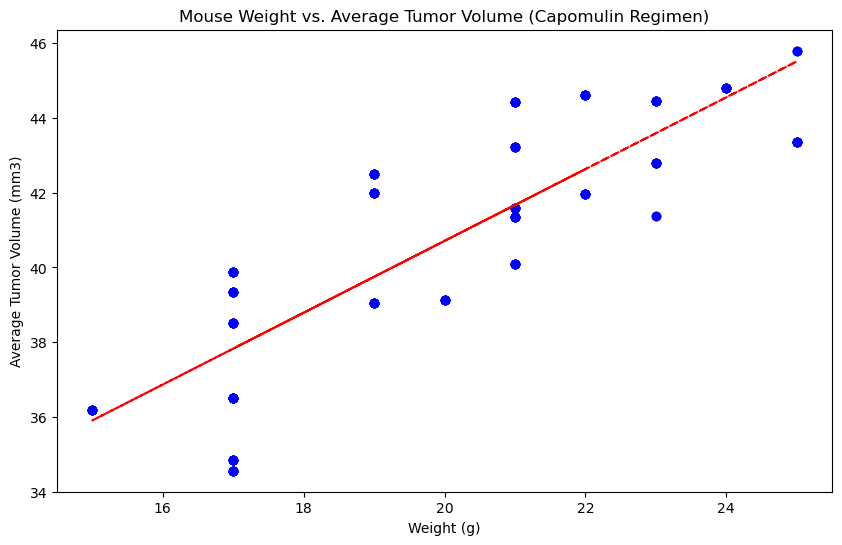

In [92]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Used Xpert Learning Assistant to finish this code.

from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)_x'])

# Perform linear regression for mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'])

# Print the correlation coefficient and linear regression results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared Value: {r_value**2}")

# Plot the linear regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_x'], color='blue', alpha=0.7)
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', linestyle='--')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
